

# Logistic Regression with Python



    


## Install and import the required libraries



Let's first import required libraries:


In [35]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss,f1_score,accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## Classification with Logistic Regression

### Scenario
Assume that you are working for a telecommunications company which is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is more likely to leave the company.


###  Load the Telco Churn data 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.


### About the dataset
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 
<br><br>
This data set provides you information about customer preferences, services opted, personal details, etc. which helps you predict customer churn.


### Load Data from URL


In [3]:
# churn_df = pd.read_csv("ChurnData.csv")
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the scikit-learn algorithm:


## Data Preprocessing


For this lab, we can use a subset of the fields available to develop out model. Let us assume that the fields we use are 'tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip' and of course 'churn'.


In [4]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


In [5]:
churn_df["churn"].value_counts(normalize=True)

churn
0    0.71
1    0.29
Name: proportion, dtype: float64

For modeling the input fields X and the target field y need to be fixed. Since that the target to be predicted is 'churn', the data under this field will be stored under the variable 'y'. We may use any combination or all of the remaining fields as the input. Store these values in the variable 'X'.


In [6]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]  #print the first 5 values

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [7]:
y = np.asarray(churn_df['churn'])
y[0:5] #print the first 5 values

array([1, 1, 0, 0, 0])

It is also a norm to standardize or normalize the dataset in order to have all the features at the same scale. This helps the model learn faster and improves the model performance. We may make use of StandardScalar function in the Scikit-Learn library.


In [8]:
x_nr=StandardScaler().fit_transform(X)

In [9]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [10]:
print(x_nr==X_norm)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


### Splitting the dataset


The trained model has to be tested and evaluated on data which has not been used during training. Therefore, it is required to separate a part of the data for testing and the remaining for training. For this, we may make use of the train_test_split function in the scikit-learn library.


In [11]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

## Logistic Regression Classifier modeling


Let's build the model using __LogisticRegression__ from the Scikit-learn package and fit our model with train data set.


In [14]:
LR = LogisticRegression().fit(X_train,y_train)

Fitting, or in simple terms training, gives us a model that has now learnt from the traning data and can be used to predict the output variable. Let us predict the churn parameter for the test data set.


In [15]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [16]:
y_tr=LR.predict_proba(X_train)

To understand this prediction, we can also have a look at the prediction probability of data point of the test data set. Use the function __predict_proba__ , we can get the probability of each class. The first column is the probability of the record belonging to class 0, and second column that of class 1. Note that the class prediction system uses the threshold for class prediction as 0.5. This means that the class predicted is the one which is most likely.


In [22]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[1]

array([0.92667894, 0.07332106])

In [68]:
yhat_prob1=LR.predict_proba(X_test)[:,1]

In [27]:
LR.coef_[0].shape

(7,)

In [29]:
print(LR.coef_[0])

[-0.84569763 -0.17566042 -0.12422107 -0.01015039  0.06012391 -0.23290551
  0.75198953]


Since the purpose here is to predict the 1 class more acccurately, you can also examine what role each input feature has to play in the prediction of the 1 class. Consider the code below.


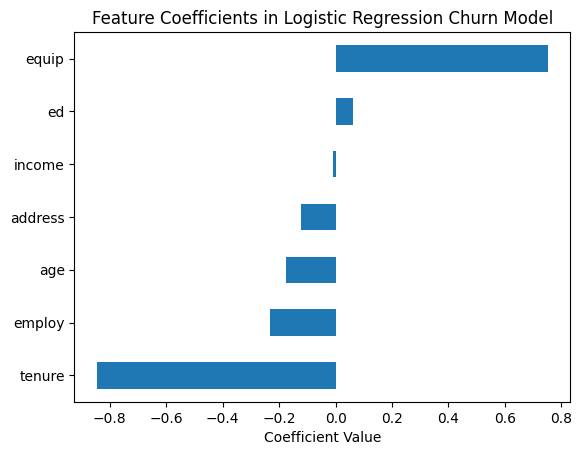

In [14]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [15]:
print(coefficients)

tenure    -0.845698
age       -0.175660
address   -0.124221
income    -0.010150
ed         0.060124
employ    -0.232906
equip      0.751990
dtype: float64


Large positive value of LR Coefficient for a given field indicates that increase in this parameter will lead to better chance of a positive, i.e. 1 class. A large negative value indicates the opposite, which means that an increase in this parameter will lead to poorer chance of a positive class. A lower absolute value indicates weaker affect of the change in that field on the predicted class. Let us examine this with the following exercises.  


## Performance Evaluation


Once the predictions have been generated, it becomes prudent to evaluate the performance of the model in predicting the target variable. Let us evaluate the log-loss value.

### log loss

Log loss (Logarithmic loss), also known as Binary Cross entropy loss, is a function that generates a loss value based on the class wise prediction probabilities and the actual class labels. The lower the log loss value, the better the model is considered to be.


In [23]:
print(log_loss(y_test,yhat))

9.912004682007218


In [24]:
log_loss(y_test, yhat_prob)

0.6257718410257235

## MODEL 1


We use GridSearchCV for searcing best "C","penlty","solver" and we can add more

In [46]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import f1_score,classification_report

In [40]:
para={
    "C":np.arange(0,10,0.1),
    "penalty":["l1","l2"],
    "solver":["lbfgs","newton-cg","sag","saga","liblinear"]
    
}

In [41]:
grid=GridSearchCV(LogisticRegression(max_iter=1000),
                  para,
                  cv=5,
                  scoring="neg_log_loss")


grid.fit(X_train,y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...max_iter=1000)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': array([0. , 0....7, 9.8, 9.9]), 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'newton-cg', ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_log_loss'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate

In [42]:
grid.best_estimator_

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",np.float64(0.2)
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [44]:
grid.best_params_

{'C': np.float64(0.2), 'penalty': 'l2', 'solver': 'saga'}

In [27]:
lr1=LogisticRegression(
    C=0.2,
    penalty="l2",
    solver= "saga",
    max_iter=1000
)

In [33]:
lr1.fit(X_train,y_train)
y_test_pr=lr1.predict(X_test)
y_train_pr=lr1.predict(X_train)
print("test f1",f1_score(y_test,y_test_pr))
print("train f1",f1_score(y_train,y_train_pr))
print("train loss",log_loss(y_train,lr1.predict_proba(X_train)))
print("testloss",log_loss(y_test,lr1.predict_proba(X_test)))
print("test and train difference",log_loss(y_train,lr1.predict_proba(X_train))-log_loss(y_test,lr1.predict_proba(X_test)))

test f1 0.42105263157894735
train f1 0.5352112676056338
train loss 0.44162063427942577
testloss 0.6035440744269341
test and train difference -0.16192344014750837


CLASSIFICATION MATRIX

In [ ]:
print(classification_report(y_test,y_test_pr)) # predict values also in class 0 and class 1

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

    accuracy                           0.72        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40



CONFUSION_MATRIX GIVE THE FN(false negative(1->0 prediction)) and TN(true negative(0->1 predict))\
IN this FN is 11 and TN is 0\
FN IS MORE IMPORTANT THIS VALUE WILL BE LOW

in this martix FN is 11 that is large values thats why we are not select and testdata f1_score   is (0.410) 

In [37]:
confusion_matrix(y_test,y_test_pr)

array([[25,  0],
       [11,  4]])

IN this test and train log error different is (0.16) .this is negligible 

## MODEL 2

CHEAKING BEST THRESHOLD BY MOVING IT BECAUSE THE DATA IS IMBALANCE (70:30)

In [38]:
y_new1=LR.predict_proba(X_test)[:,1]
print(y_new1)

[0.25356054 0.07332106 0.16557373 0.05399382 0.15674468 0.28551633
 0.22923574 0.09044358 0.73847885 0.05099269 0.15247809 0.10694992
 0.42505069 0.67434679 0.0798947  0.36698564 0.37046747 0.28733089
 0.35971867 0.22057076 0.08411055 0.35908713 0.03567993 0.44769661
 0.37716829 0.02395947 0.39825646 0.31954305 0.28215457 0.017963
 0.03550304 0.23527085 0.70566954 0.034728   0.06352263 0.11265548
 0.77737128 0.29957411 0.06057493 0.27909341]


THIS FUNCTION FIND BEST THRESHOLD FOR OVER DATA AND MAX F1 Score

In [39]:
f1=[]
tr=np.arange(0.1,0.9,0.02)
for p in tr:
    y_new=(y_new1>=p).astype(int)
    flv=f1_score(y_test,y_new)
    f1.append(flv)

print("best threshold",tr[np.argmax(f1)])
print("fl score max",max(f1))

best threshold 0.12000000000000001
fl score max 0.65


NEW DATA AFTER MOVING THRESHOLD

In [40]:

y_new=(y_new1>=0.1).astype(int)

In [41]:
print("log_loss train on 0.5 thra:",log_loss(y_train,y_tr))

log_loss train on 0.5 thra: 0.4379604101840461


In [ ]:
print("log_loss test in 0.5 thrashold",log_loss(y_test,yhat_prob)) # in probability
print("f1socre on 0.1 thrashold: ",f1_score(y_test,y_new)) # y_new must be in binary(0,1) for f1_score
print("f1score on 0.5 : ",f1_score(y_test,yhat))

log_loss test in 0.5 thrashold 0.6257718410257235
f1socre on 0.1 thrashold:  0.6190476190476191
f1score on 0.5 :  0.42105263157894735


CLASSIFICATION REPORT

In [43]:
print(classification_report(y_test,y_new))

              precision    recall  f1-score   support

           0       0.85      0.44      0.58        25
           1       0.48      0.87      0.62        15

    accuracy                           0.60        40
   macro avg       0.66      0.65      0.60        40
weighted avg       0.71      0.60      0.59        40



CONFUSION_MATRIX GIVE THE FN(false negative(1->0 prediction)) and TN(true negative(0->1 predict))\
IN this FN is 2 and TN is 14

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_new)


array([[11, 14],
       [ 2, 13]])

final conclustion is the shifting thrashold at 0.1 is the best model\
because false negative (FN=which are acutal 1 but predict 0) is only 2 and \
f1_score is max (0.61) at thrashold=0.1\
AND THIS IS THE BEST MODEL 


## MODEL 3

THIS IS THE 3RD MATHOD IN THIS WE USE CLASS_WEIGHT="BALANCED" for balancing data


In [47]:
lr3=LogisticRegression(max_iter=1000,
                       solver="lbfgs",
                       class_weight="balanced")

In [62]:
lr3.fit(X_train,y_train)
y_trn_pr=lr3.predict(X_train)
y_tst_pr=lr3.predict(X_test)
y_pro_trn=lr3.predict_proba(X_train)
y_pro_tst=lr3.predict_proba(X_test)
print("train log loss ", log_loss(y_train,y_pro_trn))
print("test log loss ", log_loss(y_test,y_pro_tst))
print("f1_score for train",f1_score(y_train,y_trn_pr))
print("f1_score for test",f1_score(y_test,y_tst_pr))

train log loss  0.5153621535831217
test log loss  0.5761831969987474
f1_score for train 0.6055045871559633
f1_score for test 0.5454545454545454


In [65]:
print(classification_report(y_test,y_tst_pr))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68        25
           1       0.50      0.60      0.55        15

    accuracy                           0.62        40
   macro avg       0.61      0.62      0.61        40
weighted avg       0.64      0.62      0.63        40



In [63]:
confusion_matrix(y_test,y_tst_pr)

array([[16,  9],
       [ 6,  9]])

still Model 2 THRESHOLD AT 0.1 IS GOOD 